In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [35]:
# generating synthetic datasets: 5 clusters, 7 features
n_values = [1000, 2000, 4000, 6000]
x_datasets = []
y_datasets = []
for n in n_values:
    x, y = make_blobs(n_samples=n, centers=5, n_features=7, random_state=42)
    x_datasets.append(x)
    y_datasets.append(y)

In [36]:
# reducing dimensionality to 2 using PCA
x_datasets_2D = []
for x in x_datasets:
    pca = PCA(n_components=2)
    x_2D = pca.fit_transform(x)
    x_datasets_2D.append(x_2D)

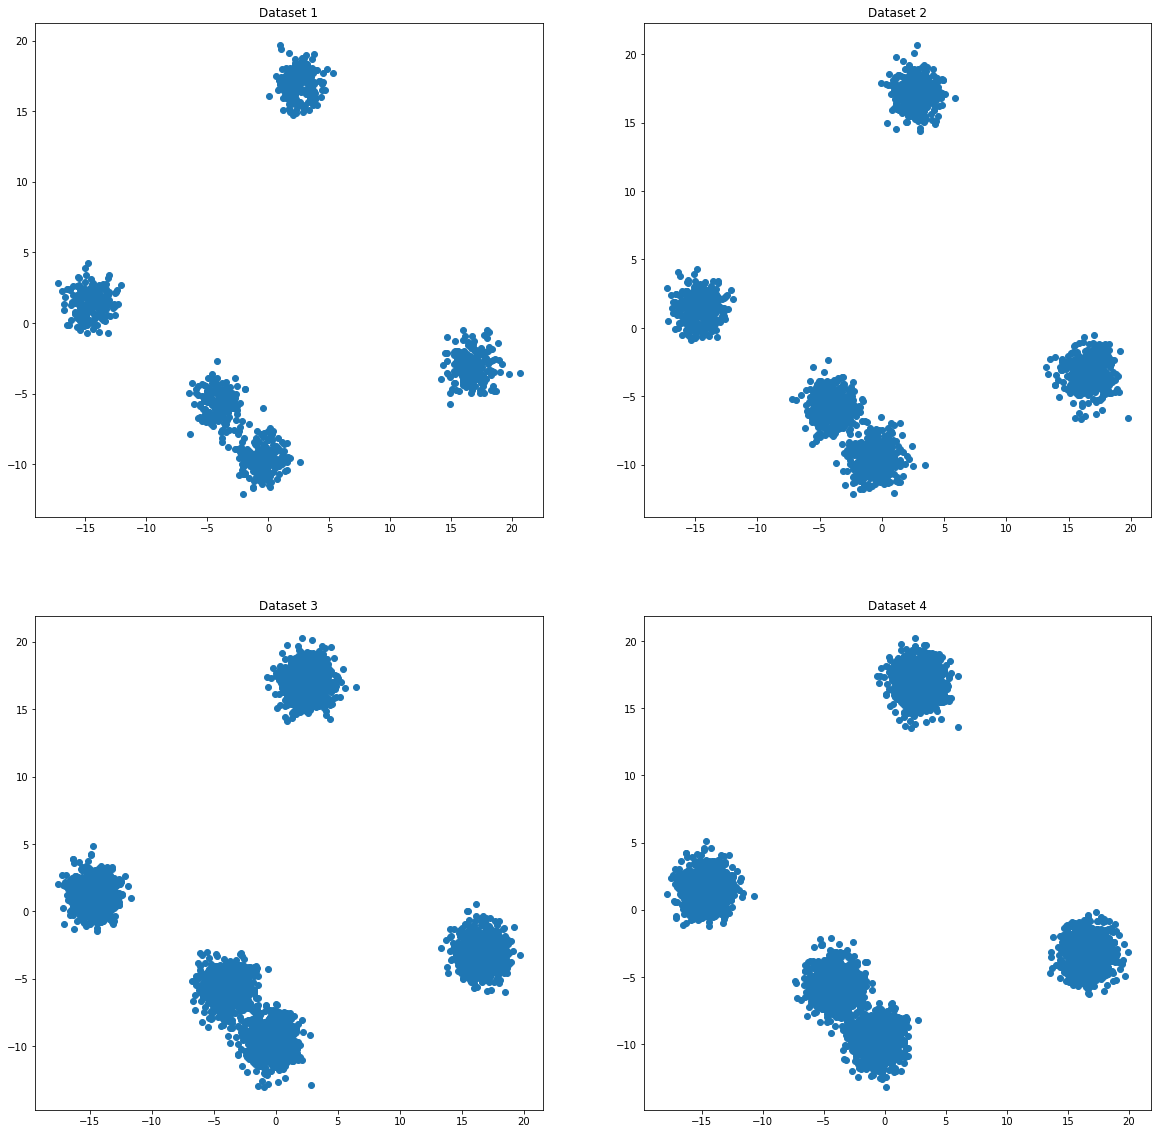

In [37]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
for i, ax in enumerate(axs.flatten()):
    ax.scatter(x_datasets_2D[i][:, 0], x_datasets_2D[i][:, 1])
    ax.set_title(f'Dataset {i+1}')

In [38]:
for i, x in enumerate(x_datasets):
    kmeans = KMeans(n_clusters=5, random_state=42)
    cluster_labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    ari = adjusted_rand_score(y_datasets[i], cluster_labels)
    print(f"Performance measures for Dataset {i+1}:")
    print(f"Silhouette Score: {silhouette_avg:.2f}")
    print(f"Adjusted Rand Index: {ari:.2f}\n")

Performance measures for Dataset 1:
Silhouette Score: 0.74
Adjusted Rand Index: 1.00

Performance measures for Dataset 2:
Silhouette Score: 0.73
Adjusted Rand Index: 1.00

Performance measures for Dataset 3:
Silhouette Score: 0.74
Adjusted Rand Index: 1.00

Performance measures for Dataset 4:
Silhouette Score: 0.74
Adjusted Rand Index: 1.00

